# **Capstone Module 3**

Capstone Module 3 (Machine Learning)

Membuat Machine Learning untuk mengelola dan membuat pemodelan dari data yang sudah diberikan.
Data yang akan digunakan adalah data Daegu Apartemen 

sumber data : [Data Daegu Apartment](https://drive.google.com/file/d/1MPDotXZNmiq6geRi8BkGd-fjttzoyTxW/view)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**

**Context**

Apartemen adalah sebuah hunian yang banyak diminati oleh orang-orang yang tinggal di perkotaan, apalagi di kota-kota besar atau kota metropolitan yang padat populasi seperti Kota Daegu di Korea Selatan, merujuk dari laman wikipedia mengenai kota [Daegu](https://id.wikipedia.org/wiki/Daegu) adalah kota metropolitan terbesar nomor empat di negara Korea Selatan.
apartemen sendiri dipilih oleh orang-orang yang tinggal di daerah perkotaan tersebut adalah dikarenakan untuk membangun rumah tapak atau membeli rumah tapak perlu mengeluarkan biaya yang sangat tinggi, sehingga apartemen adalah hunian yang dipilih orang-orang yang tinggal di perkotaan atau kota besar. Selain itu, apartemen sendiri menyediakan berbagai fasilitas, seperti kolam renang, gym, minimarket/convenience store, keamanan, dan fasilitas yang lainnya, sehingga dengan harga yang sama untuk membeli rumah pun, ada kecenderungan orang-orang lebih memilih apartemen karna fasilitas yang diberikan oleh pihak pengelola apartemen itu sendiri.

Banyak agen properti yang menawarkan unit apartemen untuk dipasarkan atau dijual kepada orang-orang yang tinggal di area perkotaan yang padat. Untuk menjadi agen properti apartemen yang dapat menjual harga properti yang ideal, caranya sangat mudah, hanya dengan membuat iklan atau penawaran bisa dengan memasang iklan pada halaman website agen properti tersebut apabila memiliki atau pada digital platform untuk forum jual beli properti dan mencantumkan harga properti yang akan dijual. Lalu, agen properti apartemen tersebut bisa mulai memasukkan daftar properti apartemennya beserta harga jual yang sudah ditentukan oleh agen tersebut. Tetapi untuk memasarkan properti berupa unit apartemen, agen properti harus merujuk kepada harga yang tepat supaya mendapat keuntungan yang bagus atau dalam artian tidak terlalu murah tetapi sesuai dengan harga yang seharusnya dikeluarkan oleh pembeli agar para calon pembeli mau untuk membeli unit yang sedang dipasarkan.


**Problem Statement**

Salah satu tantangan terbesar bagi agen properti apartemen adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi pemilik properti/agen, serta dapat memberikan pengalaman positif terhadap pembeli properti apartemen.

Mengingat bahwa harga penawaran harus ideal, untuk menentukan harga properti mereka, dengan hanya memberikan petunjuk minimal yang memungkinkan agen properti untuk menawarkan unit properti apartemennya dengan membandingkan tempat serupa di lingkungan mereka untuk mendapatkan harga yang kompetitif. Agen properti pun dapat memasukkan harga yang lebih tinggi untuk fasilitas tambahan apa pun yang mereka anggap perlu. **Dengan bertambahnya agen properti yang ada, untuk menentukan harga yang tepat untuk dapat tetap kompetitif di lingkungan sekitar unit apartemen yang akan ditawarkan sangatlah penting**.

**Goals**

Berdasarkan permasalahan tersebut, agen properti harus atau sudah memiliki 'tool' yang dapat memprediksi serta membantu mereka mereka (dalam hal ini agen properti) untuk dapat **menentukan harga jual yang tepat untuk tiap unit properti yang baru akan mereka jual**. Adanya perbedaan pada berbagai fasilitas yang terdapat pada suatu properti apartemen yang akan dijual, seperti tipe propertinya, lokasi, fasilitas dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit bagi agen properti, dan juga tentunya masih terjangkau bagi pembeli.

**Analytic Approach**

Jadi, yang perlu saya lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan properti apartemen dengan yang lainnya. 

Selanjutnya, saya akan membangun suatu model regresi yang akan membantu agen properti untuk dapat menyediakan 'tool' prediksi harga jual yang ideal, yang mana akan berguna untuk agen properti dalam menentukan harga jual listing-nya.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

ekstrak data dan menampilkan isi data dari dataset yang akan dikelola.

In [2]:
df = pd.read_csv('apartement.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


## **Data Understanding**

#### Attributes Information


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Tipe Lorong |
| TimeToSubway | Object | Jarak Tempuh Ke Stasiun Kereta Bawah Tanah |
| SubwayStation| Object | Nama Stasiun Bawah Tanah |
| N_FacilitiesNearBy(ETC) | Float | Jumlah Fasilitas Terdekat Dari Apartemen |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah Fasilitas Umum Terdekat Dari Apartemen |
| N_SchoolNearBy(University) | Float | Jumlah Sekolah Terdekat Dari Apartemen |
| N_Parkinglot(Basement) | Float | Jumlah Ketersediaan Parkir (Basement) |
| YearBuilt | Integer | Tahun Pembuatan |
| N_FacilitiesInApt |Integer | Jumlah Fasilitas Yang Berada Di Apartemen |
| Size(sqf) | Integer | Ukuran Luas Apartemen (square feet/kaki persegi) |
| SalePrice | Integer | Harga Jual |

<br>

Menampilkan/cek dari deskripsi isi data, featur(fitur), Tipe Data, Persentase Missing Value dari setiap fitur yang ada, jumlah isi dari setiap fitur, dan isi dari setiap fitur agar dapat dipahami.

In [4]:
dfDesc = []
for i in df.columns:
    dfDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=dfDesc,
columns = [
    'features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,features,DataType,Null,NullPercentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[terraced, mixed]"
1,TimeToSubway,object,0,0.0,5,"[10min~15min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Chil-sung-market, no_subway_nearby]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[4.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 5.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[108.0, 203.0]"
7,YearBuilt,int64,0,0.0,16,"[1978, 2013]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[9, 1]"
9,Size(sqf),int64,0,0.0,89,"[846, 868]"


### **EDA**

dilakukan sedikit EDA (Exploratory Data Analysist) untuk melihat lebih detail dari unique fitur yang ada beserta tipe data nya sebagai salah satu metode saya melakukan feature selection.


In [5]:
# Cek jumlah apartemen berdasarkan SubwayStation dan HallwayType nya
print(f"Jumlah properti di tiap SubwayStation group:\n{df['SubwayStation'].value_counts()}")
print(f"\nJumlah tiap HallwayType apartemen:\n{df['HallwayType'].value_counts()}")

Jumlah properti di tiap SubwayStation group:
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

Jumlah tiap HallwayType apartemen:
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64


Berdasarkan informasi data yang diperoleh, disekitar subway station Kyungbuk Uni Hospital adalah lokasi apartemen terbanyak , diikuti oleh Myung-duk, dari dataset yang diberikan, masing - masing berjumlah :

- Kyungbuk Uni Hospital : 1152
- Myung-duk : 1044

dimana nilai nya bisa mencapa 2x (dua kali) lipat dari jumlah masing-masing apartemen yang berada disekitar subway station lainnya.

untuk jenis tipe lorong apartemennya paling banyak adalah terraced dan mixed. Masing-masing bernilai :

- Terraced : 2528
- Mixed : 1131
- Corridor : 464

In [6]:
# Grouping tipe Hallway apartemen berdasarkan SubwayStation group
df.groupby(['SubwayStation', 'HallwayType'])['HallwayType'].count()

SubwayStation          HallwayType
Bangoge                mixed           502
Banwoldang             corridor         50
                       terraced        479
Chil-sung-market       mixed            74
Daegu                  corridor         51
                       terraced         14
Kyungbuk_uni_hospital  corridor         49
                       terraced       1103
Myung-duk              corridor        222
                       mixed           555
                       terraced        267
Sin-nam                corridor         51
                       terraced        416
no_subway_nearby       corridor         41
                       terraced        249
Name: HallwayType, dtype: int64

#### **Data Preprocessing**

Pada tahap ini, saya akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan saya gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [7]:
# Membuat duplikasi dataframe
df_c = df.copy()

In [8]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_c.columns:
    listItem.append([col, df_c[col].dtype, df_c[col].isna().sum(), round((df_c[col].isna().sum()/len(df_c[col]))*100, 2),
                    df_c[col].nunique(), list(df_c[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[corridor, mixed]"
1,TimeToSubway,object,0,0.0,5,"[0-5min, 10min~15min]"
2,SubwayStation,object,0,0.0,8,"[no_subway_nearby, Bangoge]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[1.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[1.0, 4.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 4.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[56.0, 524.0]"
7,YearBuilt,int64,0,0.0,16,"[2014, 2003]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[1, 10]"
9,Size(sqf),int64,0,0.0,89,"[903, 1035]"


**Cek Missing Value**

In [9]:
# Missing Value 
df_c.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

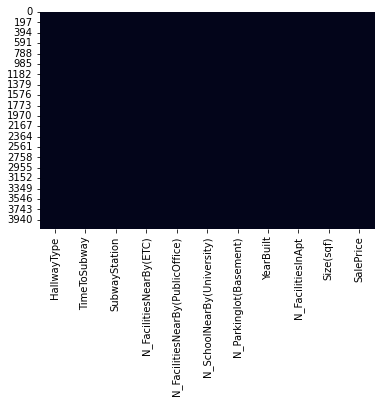

In [10]:
## cek missing value dengan heatmap

# Missing value heatmap
sns.heatmap(df_c.isnull(), cbar=False);

dari informasi data yang didapat diatas, tidak terdapat adanya missing value sehingga tidak ada treatment kusus yang harus diberikan atau drop column yang harus dilakukan.

In [11]:
# Cek data duplikat
df_c[df_c.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [12]:
# Cek data duplikat
df_c.duplicated().sum()

1422

terdapat duplikasi data sebanyak 1422, sehingga kita harus melakukan penanganan yaitu dengan melakukan drop duplikasi data.

In [13]:
## Drop duplikasi data
df_c.drop_duplicates(inplace=True)

In [14]:
# Cek data duplikat
df_c.duplicated().sum()

0

In [15]:
# Cek data duplikat
df_c[df_c.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice


**Seleksi Fitur**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap ini, menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge, semua fitur yang ada dalam dataset tersebut saling berelevansi satu sama lain, sehingga tidak perlukan adanya drop kolom.
- dan dari jumlah feature yang terbatas, sehingga saya tidak melakukan drop columns


**Cek Info Dataset**

In [16]:
# Cek info dataset
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


**Data Correlation**

In [17]:
import dython
from dython.nominal import associations, cramers_v, theils_u, correlation_ratio

Cek Korelasi SubwayStation, TimeToSubway, HallwayType terhadap SalePrice,
untuk tipe data object pada dataset ini, akan dilakukan pengecekan korelasi menggunakan Association Correlation supaya tidak perlu mengganti tipe data dari fitur tersebut.

Association Correlation digunakan untuk melihat hubungan antar kolom dimana kolom tersebut bertipe object

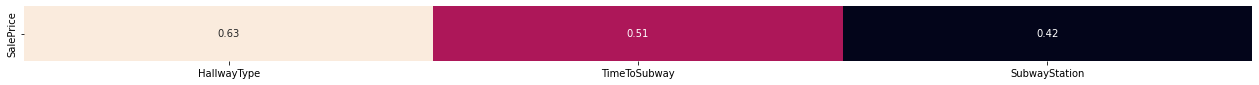

In [69]:
assoc_cr = []
col = ['HallwayType', 'TimeToSubway', 'SubwayStation']
for i in col: 
    assoc = round(cramers_v(df['SalePrice'], df[i]), 2) 
    assoc_cr.append(assoc)
    
df_cr = pd.DataFrame(data = [assoc_cr], columns = col, index=['SalePrice'])

plt.figure(figsize=(22, 1))
sns.heatmap(df_cr, annot = True, cbar=False)
plt.show()

Cek korelasi dengan menggunakan Matrix Correlation dengan tipe data selain object

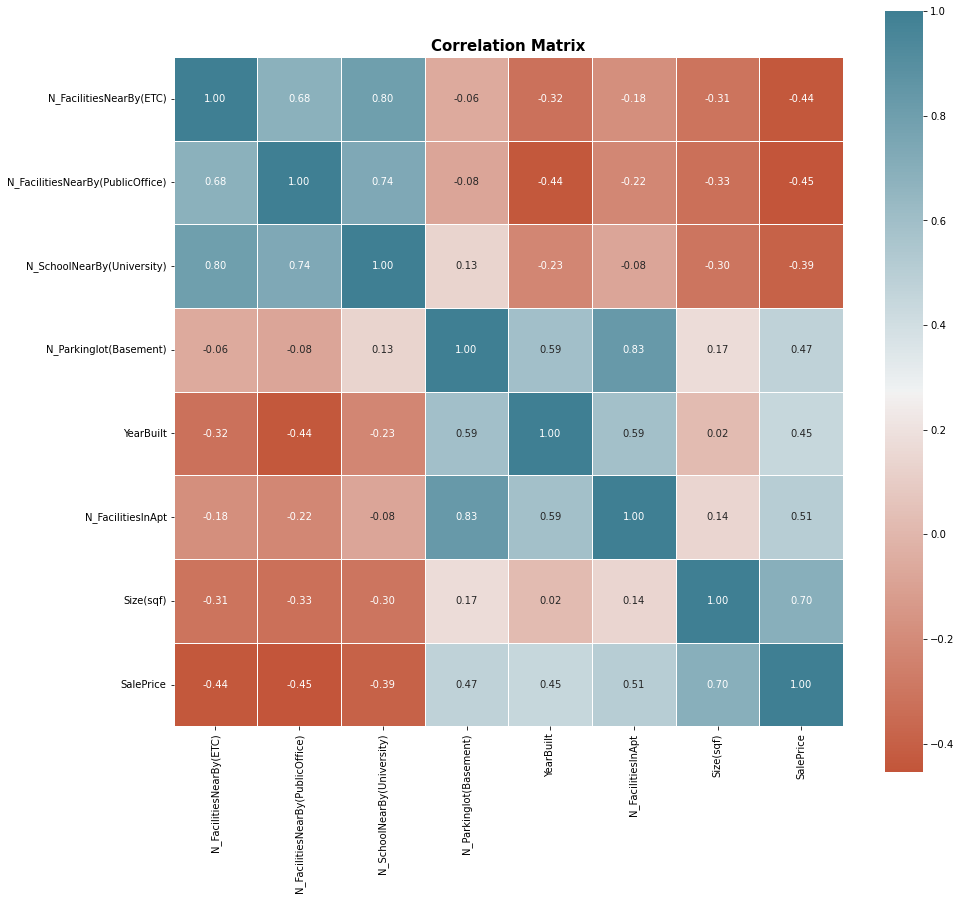

In [19]:
# Correlation matrix
plt.figure(figsize=(15, 14))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Dari hasil korelasi asosiasi & korelasi matrix menunjukan tidak ada fitur yang korelasi tinggi, tetapi dapat dilihat bahwa ada beberapa fitur yang memiliki korelasi positif dan negaitf, yaitu :

Korelasi Positif (+) :
- Size(sqf)
- HallwayType
- N_FacilitiesInApt       
- TimeToSubway            

Korelasi Negatif (-)
- N_FacilitiesNearBy(PublicOffice)
- N_FacilitiesNearBy(ETC)
- N_SchoolNearBy(University)

Korelasi matrix digunakan untuk melihat hubungan antar kolom yang bertipe numerik, disini saya menggunakan pearson correlation dikarenakan saya ingin melihat linear correlation dimana pearson correlation sangat cocok digunakan untuk mencari hubungan linear correlation.

## Modeling

In [20]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, StratifiedKFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Splitting Data & Train-Test Data**

In [49]:
## Memisahkan Data Variabel independen dengan target
X = df_c.drop(columns=['SalePrice'])
y = df_c['SalePrice']

saya melakukan splitting data dengan proporsi train 80% dan test 20%

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.20, random_state=42)

In [51]:
X_train.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
3344,terraced,0-5min,Kyungbuk_uni_hospital,0.00,5.00,3.00,930.00,2013,7,907
3293,terraced,0-5min,Myung-duk,5.00,7.00,5.00,1174.00,2014,9,914
3655,terraced,0-5min,Banwoldang,0.00,4.00,1.00,605.00,2007,5,1444
1238,terraced,0-5min,Sin-nam,0.00,1.00,2.00,536.00,2006,5,914
1940,mixed,5min~10min,Bangoge,5.00,5.00,4.00,798.00,2005,7,743


In [52]:
pd.options.display.float_format = '{:.2f}'.format

In [53]:
def Eva_Matrix_DF(Model,X_train, X_test, y_train, y_test, Nama):
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
        'Training' + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
        'Testing' + Nama : [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data=data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

saya menggunakan def function Eva_Matrix_DF untuk melakukan pengecekan evaluation matrix

**Pipeline**

Saya menggunakan pipeline untuk menghindari data leakage (kebocoran data).

Yang dimaksud data Leakage atau kebocoran data adalah kondisi dimana model sudah melihat data test, padahal seharusnya model hanya boleh melihat data train.

Kesimpulan dari PipeLine adalah agar data tidak menghafal dari hasil data train sebelum-sebelumnya

In [54]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, StratifiedKFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [70]:
# Encode Tipe Data

num_columns = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt','N_FacilitiesInApt','Size(sqf)']
cat_columns = ['HallwayType', 'TimeToSubway', 'SubwayStation']

saya mengelempokan feature berdasarkan tipe datanya, yaitu :
- numerikal 
- kategorikal 

alasannya adalah karena saya akan menerapkan metode feature engineering yang berbeda untuk ke dua kelompok feature tersebut.

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Pipeline yang Modelnya menggunakan Scaller

numeric_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns)
], remainder='passthrough')

pipe_SVR = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR())
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

**penjelasan** 

Saya membuat dua jenis pipeline untuk feature engineering, yaitu:
- `numeric_pipeline`
- `categoric_pipeline`

didalam numeric_pipeline, saya melakukan feature engineering yaitu `PolynomialFeatures` dengan degree 3 dan tidak mengikutkan    
bias nya (pangkat 0). 
Selain PolynomialFeatures saya juga melakukan PowerTransformer dengan menggunakan metode `yeo-johnson`.

`numeric_pipeline` ini saya gunakan untuk melakukan feature engineering pada kelompok feature numeric columns

-----------------------------------------------------------------------------------------------------------------------------
Didalam `categoric_pipeline`, saya melakukan feature engineering yaitu `OneHotEncoder`, saya menggunakan one hot encoder untuk melakukan encoding kolom bertipe data kategorikal yang bersifat nominal.

`categoric_pipeline` ini saya gunakan untuk melakukan feature engineering pada kelompok feature categoric columns

In [58]:
# Pipeline yang Modelnya tidak menggunakan Scaller
numeric_pipeline = Pipeline([
    # ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns)
], remainder='passthrough')

pipe_DTree = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor())
])

**penjelasan**

Saya melakukan tambahan feature engineering yaitu 
- scalling
- non scalling

menggunakan 2 metode feature engineering scaling untuk algoritma yang berbasis jarak. contohnya seperti knn svm dll, untuk yang non scalling saya gunakan untuk algoritma yang berbasis pohon, contohnya : XGB, randomg forest dll.

selanjutnya kita akan melakukan step untuk training data


In [59]:
# Mentraining Data
### Melakukan Training Data

dfbase = [pipe_SVR, pipe_KNN, pipe_DTree, pipe_RF, pipe_XGB]

for i in dfbase:
    i.fit(X_train, y_train)

In [60]:
# Evaluasion Matrix
df_SVR_base = Eva_Matrix_DF(pipe_SVR, X_train, X_test, y_train, y_test, 'Base SVR')
df_KNN_base = Eva_Matrix_DF(pipe_KNN, X_train, X_test, y_train, y_test, 'Base KNN')
df_DTree_base = Eva_Matrix_DF(pipe_DTree, X_train, X_test, y_train, y_test, 'Base DTree')
df_RF_base = Eva_Matrix_DF(pipe_RF, X_train, X_test, y_train, y_test, 'Base RF')
df_XGB_base = Eva_Matrix_DF(pipe_XGB, X_train, X_test, y_train, y_test, 'Base XGB')

In [61]:
# Menampilkan Hasil Evaluasi Matrix
df_all = pd.concat([df_SVR_base, df_KNN_base, df_DTree_base, df_RF_base, df_XGB_base], axis=1)
df_all

,TrainingBase SVR,TestingBase SVR,TrainingBase KNN,TestingBase KNN,TrainingBase DTree,TestingBase DTree,TrainingBase RF,TestingBase RF,TrainingBase XGB,TestingBase XGB
R2,-0.00,-0.01,0.80,0.76,0.83,0.78,0.83,0.78,0.83,0.78
MAE,85419.65,84005.53,36966.21,40099.42,35267.62,38807.91,35364.84,38924.34,35267.70,38905.13
MSE,11193203645.35,10724427026.06,2200969999.32,2599996875.44,1918744587.00,2290272311.75,1921564240.46,2296636436.92,1918744589.95,2296156668.32
RMSE,105797.94,103558.81,46914.50,50990.16,43803.48,47856.79,43835.65,47923.23,43803.48,47918.23


### Hasil dari Evaluation Matrix :
Dapat dilihat bahwa dari hasil Evaluation Matrix diatas menghasilkan nilai yaitu :
- 2 Model dengan Nilai RMSE terbaik adalah Model Random Forest dan XGBoost dengan hasil yang berbeda sangat tipis, RF = 47923.23 dan XGB = 47918.23
- 2 Model tersebut memiliki nilai RMSE yang lebih rendah dibandingkan dengan Model lain, sehingga perlu dilakukan Hyper Parameter Tuning
- Model dengan Nilai terburuk adalah Model SVR dengan hasil nilai RMSE yang tinggi
- Model yang akan dilakukan Tunning adalah XGB

### **Improvement / Tuning**
##### XG Boost Hyper Parameter Tuning

In [62]:
# Menampilkan parameter apa saja yang dapat digunakan
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('poly',
                                                     PolynomialFeatures(degree=3,
                                                                        include_bias=False)),
                                                    ('power',
                                                     PowerTransformer())]),
                                    ['N_FacilitiesNearBy(ETC)',
                                     'N_FacilitiesNearBy(PublicOffice)',
                                     'N_SchoolNearBy(University)',
                                     'N_Parkinglot(Basement)', 'YearBuilt',
                                     'N_FacilitiesInApt', 'Size(sqf)']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                

**Penjelasan**

alasan saya improvement menggunakan XGB karena hasil evaluation matrixnya yang terbaik atau paling bagus diantara algoritma yang lainnya seperti :
- Random Forest
- SVR
- Decision Tree

sehingga saya melakukan tuning hyperparameternya menggunakan XGB

- `XGB` sendiri, atau memiliki nama lain Extreme Gradient Boosting adalah salah satu algoritme paling populer yang berbasis tree. Dimana XGB sendiri adalah versi upgrade dari algoritma Gradient Boosting milik `SKLEARN`.

**cara kerja XGB**
- cara kerjanya sendiri menyerupai seperti kita bermain golf, dimana `hole` adalah target utama
- kemudian model akan secara pelan-pelan melakukan perbaikan (pukulan) sampai mencapai target (bola masuk hole)

In [35]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
algo__learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
param_XGB = {
    'algo__max_depth': max_depth, 
    'algo__learning_rate': algo__learning_rate,
    'algo__n_estimators': n_estimators,
    'algo__subsample': subsample,
    'algo__gamma': gamma,
    'algo__colsample_bytree': colsample_bytree,
    'algo__reg_alpha': reg_alpha
}

In [36]:
RS_XGB = RandomizedSearchCV(pipe_XGB, param_XGB, cv = 4, n_jobs=-1, verbose=1, scoring ='neg_root_mean_squared_error', n_iter=500)

In [37]:
RS_XGB.fit(X_train, y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


/Users/sadewo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/sadewo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/sadewo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/sadewo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/sadewo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/sadewo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=kee

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(degree=3,
                                                                                                                   include_bias=False)),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                             

In [38]:
XGB_Tuned = RS_XGB.best_estimator_

In [39]:
df_XGB = Eva_Matrix_DF(XGB_Tuned, X_train, X_test, y_train, y_test, 'XG Boost Tuned')
df_XGB

,TrainingXG Boost Tuned,TestingXG Boost Tuned
R2,0.83,0.79
MAE,35776.40,38890.38
MSE,1944783108.88,2273624872.54
RMSE,44099.70,47682.54


**Hasil Akhir**

**Before Tuning**

In [41]:
df_XGB_base 

,TrainingBase XGB,TestingBase XGB
R2,0.83,0.78
MAE,35267.70,38905.13
MSE,1918744589.95,2296156668.32
RMSE,43803.48,47918.23


**After Tuning**

In [42]:
df_XGB

,TrainingXG Boost Tuned,TestingXG Boost Tuned
R2,0.83,0.79
MAE,35776.40,38890.38
MSE,1944783108.88,2273624872.54
RMSE,44099.70,47682.54


In [63]:
# Menampilkan hasil Evaluation Matrix dengan menggabungkan 2 model terbaik sebelum data sesudah di Tunning
df_tuned = pd.concat([df_XGB_base, df_XGB], axis=1)
df_tuned

,TrainingBase XGB,TestingBase XGB,TrainingXG Boost Tuned,TestingXG Boost Tuned
R2,0.83,0.78,0.83,0.79
MAE,35267.70,38905.13,35776.40,38890.38
MSE,1918744589.95,2296156668.32,1944783108.88,2273624872.54
RMSE,43803.48,47918.23,44099.70,47682.54


##### Dapat dilihat bahwa dari Model yang sudah di Tunning terdapat perbedaan Nilai pada RMSE
- Nilai RMSE Testing XGB awal 47918.23 turun menjadi 47682.54

**Analisis Error untuk model terbaik**

In [64]:
y_pred=XGB_Tuned.predict(X_test)

In [65]:
# Pengecekan Nilai Error
error = abs(y_pred-y_test)
pd.DataFrame(error).head()

,SalePrice
2927,26750.72
1427,73029.38
2081,12059.73
352,85383.34
1861,32717.00


**Penjelasan**

dari sampel error, dimana selisih antara data aktual dan data prediksi untuk SalePrice.
berarti menunjukan bahwa model bisa saja prediksinya meleset kurang atau lebih dari harga aktual dengan rata-rata error sebesar **38890.38** (dari nilai MAE nya)

In [66]:
X_test['error'] = error

In [67]:
X_test.sort_values('error', ascending=False).head(20)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),error
896,terraced,0-5min,Sin-nam,0.00,1.00,2.00,536.00,2006,5,1412,129464.22
2653,terraced,10min~15min,Kyungbuk_uni_hospital,1.00,5.00,1.00,0.00,1986,4,1377,129208.78
3558,terraced,10min~15min,Kyungbuk_uni_hospital,1.00,5.00,1.00,0.00,1986,4,1377,120358.78
1998,terraced,0-5min,Kyungbuk_uni_hospital,0.00,3.00,2.00,1270.00,2007,10,1643,119520.72
2085,mixed,15min~20min,Myung-duk,5.00,6.00,5.00,536.00,1993,4,2337,118658.08
3518,terraced,10min~15min,Kyungbuk_uni_hospital,1.00,5.00,1.00,0.00,1986,4,1377,118588.78
1568,mixed,15min~20min,Myung-duk,5.00,6.00,5.00,536.00,1993,4,1761,118117.62
2613,terraced,0-5min,Kyungbuk_uni_hospital,0.00,3.00,2.00,1270.00,2007,10,1928,116817.50
2880,mixed,15min~20min,Myung-duk,5.00,6.00,5.00,536.00,1993,4,2337,116445.08
1353,terraced,0-5min,Banwoldang,0.00,2.00,2.00,524.00,2007,4,1366,112914.38


Dari hasil error yang ditampilkan, nilai error terbesar dari hasil model tuning XGB yaitu sebesar : 126395.34, itu menandakan bahwa :
- Prediksi dari SalePrice bisa saja OverEstimation terbesarnya yaitu 126395.34
- Prediksi dari SalePrice bisa saja UnderEstimation terbesarnya 126395.34

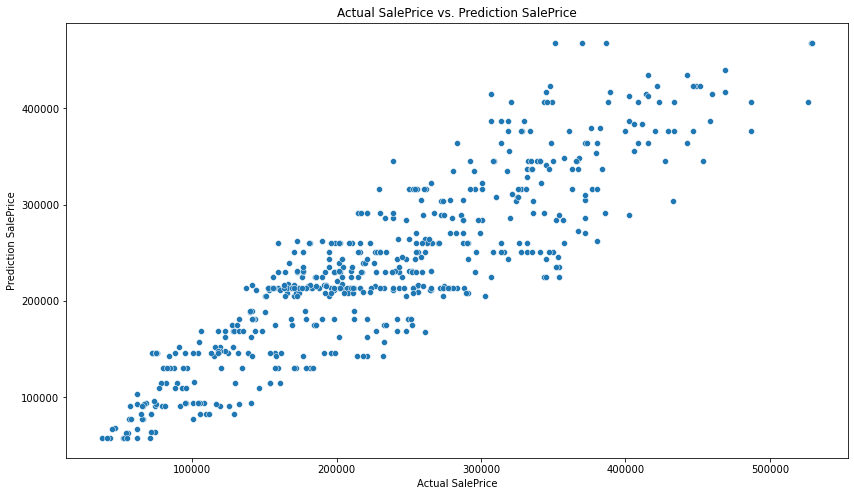

In [68]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual SalePrice vs. Prediction SalePrice', 
                                               xlabel='Actual SalePrice', 
                                               ylabel='Prediction SalePrice');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai RMSE yang didapat, yaitu sebesar 47733.13 menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting'.

Dari hasil yang didapatkan, error terbesar disebabkan dari HallwayType : Terraced

## **Conlusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Size' dan 'N_FacilitiesApt' menjadi fitur yang paling berpengaruh terhadap 'SalePrice'.

Metrik evaluasi yang digunakan pada model adalah nilai R2, MAE, MSE & RMSE. Jika ditinjau dari nilai RMSE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 47733.13 , kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga SalePrice baru di Daegu pada rentang nilai seperti yang dilatih terhadap model (maksimal harga 585840.00) **untuk satuan harga tidak diketahui, karena tidak ada di deskripsi data atau dictionary data yang diberikan**, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar **38748.11** dari harga yang mungkin seharusnya. Tetapi, tidak menutup kemungkinan juga prediksinya meleset karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh fitur HallwayType yaitu Terraced dan kurangnya fitur pada dataset yang bisa merepresentasikan aspek properti apartemen dan juga services seperti jumlah kamar dalam unit apartemen, biaya maintenance dan lain-lain.

## **Recomendation**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

- Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.

- Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('SalePrice'), seperti jumlah kamar dalam satu unit,  jarak ke pusat kota & biaya maintenance apartemen. Selain itu, adanya penambahan data terkini untuk Daegu Apartemen Data tentu akan dapat mengimprovisasi kapasitas prediksi dari model. Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.

# **Thank You**